# Extra Trees
In the following Jupyter Notebook, we will be using the Extra Trees or **Extremely Randomized Trees** algorithm ensemble with k-fold cross validation on the Volatile Organic Compound GCMS readings. 

In [1]:
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# define the evaluation procedure
	cv = KFold(n_splits=10, shuffle=True, random_state=1)
	# evaluate the model and collect the results
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores

# Explore different amounts of trees

In [2]:
import time
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from matplotlib import pyplot

In [3]:
#get data
raw = pd.read_csv('../data/cleaned/long.csv')
filled = raw.fillna(0)

In [4]:
#store results from formula below
vary_trees = pd.DataFrame(columns=["mean","std"])

>10 0.739 (0.148) (1.196)


>50 0.796 (0.133) (0.949)


>100 0.797 (0.132) (0.831)
>150 0.796 (0.126) (0.658)


>200 0.810 (0.130) (0.560)


>250 0.843 (0.112) (0.502)


>300 0.810 (0.110) (0.466)


>350 0.821 (0.122) (0.448)


>500 0.831 (0.127) (0.442)


>750 0.832 (0.123) (0.454)


>1000 0.821 (0.122) (0.483)


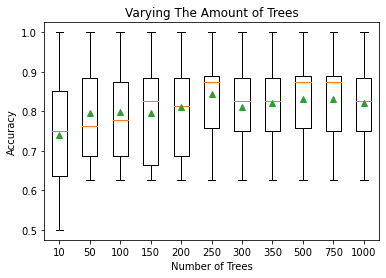

In [5]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 150, 200, 250, 300, 350, 500, 750, 1000]
	for n in n_trees:
		models[str(n)] = ExtraTreesClassifier(n_estimators=n)
	return models
 
# define dataset
X, y = filled.iloc[:,3:], filled.iloc[:,1]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names, times = list(), list(), list()
for name, model in models.items():
	# evaluate the model
	start = time.time()
	scores = evaluate_model(model, X, y)
	end = time.time()
	# store the results
	times.append(end-start)
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	s = pd.Series(data=[np.mean(scores), np.std(scores), np.mean(times)],name=name, index=['mean','std', 'time'])
	vary_trees = vary_trees.append(s)
	print('>%s %.3f (%.3f) (%.3f)' % (name, np.mean(scores), np.std(scores), np.mean(times)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Varying The Amount of Trees')
pyplot.xlabel('Number of Trees')
pyplot.ylabel('Accuracy')
pyplot.savefig('../images/ex_tree/vary_trees.png')
pyplot.show()

In [6]:
#find average of all stored results
avg_vary_trees = pd.DataFrame(columns=['mean', 'std', 'time'])
for i in [10, 50, 100, 150, 200, 250, 300, 350, 500, 750, 1000]:
    i = str(i)
    s = pd.Series(vary_trees.T[i].mean(axis=1), name=i, index=['mean','std', 'time'])
    avg_vary_trees = avg_vary_trees.append(s)

ValueError: No axis named 1 for object type <class 'pandas.core.series.Series'>

In [147]:
avg_vary_trees.sort_values(by='mean', ascending=0).head(7)

,mean,std,time
100,0.845833,0.128862,0.380265
250,0.837222,0.120972,0.587315
1000,0.836389,0.120152,1.374869
750,0.834167,0.127219,1.101315
500,0.830000,0.124863,0.891527
300,0.829722,0.110469,0.667365
150,0.826389,0.134197,0.430059


In [148]:
avg_vary_trees.to_csv('../data/cleaned/ex_trees/avg_vary_trees.csv', index=True)

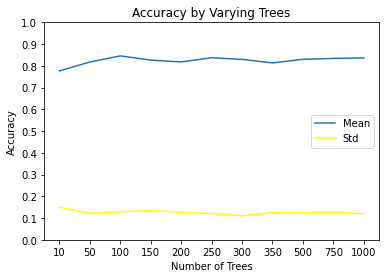

In [149]:
line1 = pyplot.plot(avg_vary_trees.index, avg_vary_trees['mean'], label='Mean')
line2 = pyplot.plot(avg_vary_trees.index, avg_vary_trees['std'], c='yellow', label='Std')
pyplot.title('Accuracy by Varying Trees')
pyplot.xlabel('Number of Trees')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.yticks(ticks=np.arange(0,1.1,0.1))
pyplot.savefig('../images/ex_tree/vary_trees2.png')
pyplot.show()

## Explore different amounts of features

In [150]:
#store results from formula below
vary_feat = pd.DataFrame(columns=["mean","std"])

>1 0.812 (0.177) (0.437)
>2 0.819 (0.145) (0.430)
>3 0.811 (0.092) (0.430)
>4 0.796 (0.145) (0.449)
>5 0.819 (0.136) (0.438)
>6 0.833 (0.120) (0.431)
>7 0.821 (0.145) (0.428)
>8 0.819 (0.127) (0.432)
>9 0.832 (0.112) (0.429)
>10 0.843 (0.112) (0.427)
>11 0.796 (0.136) (0.430)
>12 0.868 (0.102) (0.432)
>13 0.819 (0.167) (0.433)
>14 0.856 (0.092) (0.433)
>15 0.818 (0.166) (0.434)
>16 0.843 (0.134) (0.438)
>17 0.796 (0.126) (0.441)
>18 0.831 (0.137) (0.441)
>19 0.868 (0.116) (0.440)
>20 0.857 (0.108) (0.439)
>21 0.854 (0.121) (0.439)
>22 0.832 (0.135) (0.439)
>23 0.819 (0.136) (0.439)
>24 0.856 (0.092) (0.439)
>25 0.807 (0.136) (0.439)
>26 0.876 (0.125) (0.440)
>27 0.818 (0.128) (0.441)
>28 0.868 (0.102) (0.443)
>29 0.819 (0.136) (0.446)
>30 0.831 (0.127) (0.449)
>31 0.833 (0.123) (0.450)
>32 0.843 (0.132) (0.450)
>33 0.843 (0.112) (0.450)
>34 0.843 (0.154) (0.450)
>35 0.819 (0.116) (0.451)
>36 0.844 (0.106) (0.451)
>37 0.854 (0.121) (0.451)
>38 0.808 (0.125) (0.451)
>39 0.833 (0.123) (0.

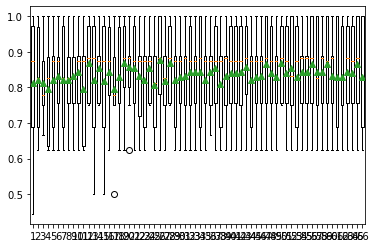

In [166]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore number of features from 1 to 20
	depths = [i for i in range(1,67)] + [None]
	for i in range(1, 67):
		models[str(i)] = ExtraTreesClassifier(max_features=i)
	return models
 
# define dataset
X, y = filled.iloc[:,3:], filled.iloc[:,1]
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names, times = list(), list(), list()
for name, model in models.items():
	# evaluate the model
	start = time.time()
	scores = evaluate_model(model, X, y)
	end = time.time()
	# store the results
	times.append(end-start)
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	s = pd.Series(data=[np.mean(scores), np.std(scores), np.mean(times)],name=name, index=['mean','std', 'time'])
	vary_feat = vary_feat.append(s)
	print('>%s %.3f (%.3f) (%.3f)' % (name, np.mean(scores), np.std(scores), np.mean(times)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [167]:
#find average of all stored results
avg_vary_feat = pd.DataFrame(columns=['mean', 'std', 'time'])
for i in range(1, 67):
    i = str(i)
    s = pd.Series(vary_feat.T[i].mean(axis=1), name=i, index=['mean','std', 'time'])
    avg_vary_feat = avg_vary_feat.append(s)

In [168]:
avg_vary_feat.sort_values(by='mean', ascending=0)

,mean,std,time
28,0.860185,0.120365,0.431922
60,0.855556,0.119315,0.468235
19,0.855093,0.120220,0.423872
12,0.855093,0.115732,0.419409
62,0.854167,0.137710,0.470093
...,...,...,...
2,0.807870,0.133455,0.416042
8,0.804630,0.130038,0.425770
5,0.800000,0.134741,0.416812
3,0.798148,0.128908,0.414176


In [169]:
avg_vary_feat.to_csv('../data/cleaned/ex_trees/avg_vary_feat.csv', index=True)

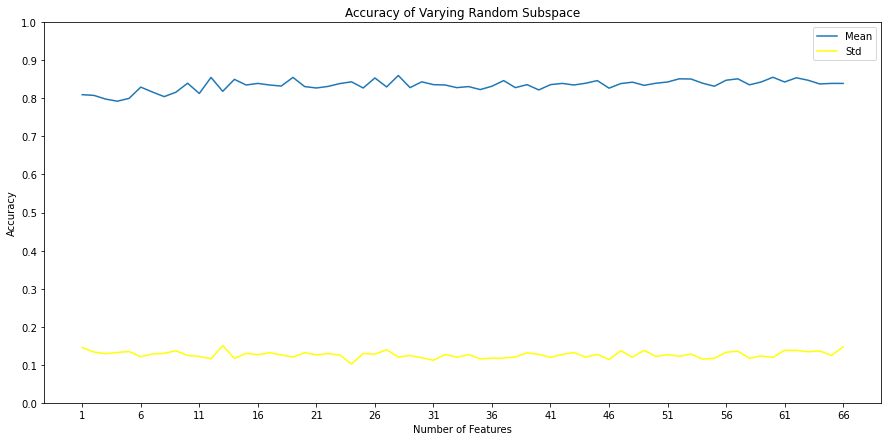

In [170]:
pyplot.figure(figsize=(15,7))
line1 = pyplot.plot(avg_vary_feat.index, avg_vary_feat['mean'], label='Mean')
line2 = pyplot.plot(avg_vary_feat.index, avg_vary_feat['std'], c='yellow', label='Std')
pyplot.title('Accuracy of Varying Random Subspace')
pyplot.xlabel('Number of Features')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.yticks(ticks=np.arange(0,1.1,0.1))
pyplot.xticks(ticks=np.arange(0,66,5))
pyplot.savefig('../images/ex_tree/vary_features2.png')
pyplot.show()

## Exploring number of minimum splits

In [157]:
min_trees = pd.DataFrame(columns=["mean","std"])

>2 0.807 (0.102) (0.414)
>3 0.821 (0.122) (0.448)
>4 0.844 (0.123) (0.453)
>5 0.832 (0.112) (0.448)
>6 0.843 (0.148) (0.447)
>7 0.821 (0.100) (0.460)
>8 0.844 (0.079) (0.470)
>9 0.808 (0.127) (0.467)
>10 0.844 (0.109) (0.462)
>11 0.810 (0.175) (0.460)
>12 0.811 (0.128) (0.459)
>13 0.761 (0.150) (0.459)
>14 0.787 (0.163) (0.459)


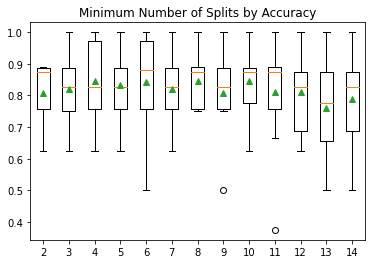

In [206]:
# get a list of models to evaluate
def get_models():
	models = dict()
	# explore the number of samples per split from 2 to 14
	for i in range(2, 15):
		models[str(i)] = ExtraTreesClassifier(min_samples_split=i)
	return models

#get models to evaluate
models = get_models()
# evaluate the models and store results
results, names, times = list(), list(), list()
for name, model in models.items():
	# evaluate the model
	start = time.time()
	scores = evaluate_model(model, X, y)
	end = time.time()
	# store the results
	times.append(end-start)
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	s = pd.Series(data=[np.mean(scores), np.std(scores), np.mean(times)],name=name, index=['mean','std', 'time'])
	min_trees = min_trees.append(s)
	print('>%s %.3f (%.3f) (%.3f)' % (name, np.mean(scores), np.std(scores), np.mean(times)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Minimum Number of Splits by Accuracy')
pyplot.show()

In [207]:
#find average of all stored results
avg_min_trees = pd.DataFrame(columns=['mean', 'std', 'time'])
for i in range(2, 15):
    i = str(i)
    s = pd.Series(min_trees.T[i].mean(axis=1), name=i, index=['mean','std', 'time'])
    avg_min_trees = avg_min_trees.append(s)

In [208]:
avg_min_trees.sort_values(by='mean', ascending=0)

,mean,std,time
5,0.840625,0.121579,0.466845
6,0.838542,0.129656,0.456768
4,0.835417,0.127490,0.480980
8,0.832143,0.117967,0.449537
9,0.828026,0.125235,0.445014
3,0.827579,0.127812,0.506220
7,0.825992,0.123191,0.452800
10,0.820833,0.124524,0.443896
2,0.819891,0.128333,0.589285
11,0.812500,0.129678,0.443245


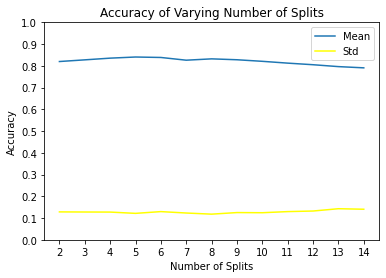

In [209]:
line1 = pyplot.plot(avg_min_trees.index, avg_min_trees['mean'], label='Mean')
line2 = pyplot.plot(avg_min_trees.index, avg_min_trees['std'], c='yellow', label='Std')
pyplot.title('Accuracy of Varying Number of Splits')
pyplot.xlabel('Number of Splits')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.yticks(ticks=np.arange(0,1.1,0.1))
pyplot.savefig('../images/ex_tree/vary_splits2.png')
pyplot.show()

In [177]:
avg_min_trees.to_csv('../data/cleaned/ex_trees/avg_min_split.csv', index=True)

## Best Performing Model According to experimentation
1. amount of trees = 100
2. number of features = all (66) ??
3. number of minimum splits = 2

Experimentation has proved that for the most part, the default values of Extra Tree's hyperparameters are not the best suited values for this particular model. Through thorough experimentation, we deduce that the number of minimum splits is best suited to 7 in this particular case over time. Although it should be noted that the gain in variance and standard deviation is miniscule. As well as this, similarly to the random forest model, experimentation results suggest that the number of features to be included remains ambiguous. The general rule of thumb for the number of features to be used in a classification task is the sqrt(number of features), which in our case rounds to 8. However, including only 1 to 10 features on average achieves the lowest results for mean accuracy, although the std is marginally smaller than for other hyperparameter selections such as 50.

In [210]:
final_results = pd.DataFrame(columns=['mean accuracy', 'mean std'])

In [212]:
final_model = ExtraTreesClassifier(n_estimators=100, max_features='sqrt', min_samples_split=2)

# define dataset
X, y = filled.iloc[:,3:], filled.iloc[:,1]

results, names = list(), list()
for i in range(50):
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    s = pd.Series(data=[np.mean(scores), np.std(scores)],name=name, index=['mean','std'])
    final_results = final_results.append(s)
    print('>%s %.3f (%.3f)' % (i, np.mean(scores), np.std(scores)))

>0 0.822 (0.112)
>1 0.797 (0.125)
>2 0.797 (0.132)
>3 0.822 (0.139)
>4 0.808 (0.137)
>5 0.787 (0.124)
>6 0.797 (0.143)
>7 0.785 (0.192)
>8 0.772 (0.126)
>9 0.786 (0.163)
>10 0.787 (0.169)
>11 0.833 (0.123)
>12 0.832 (0.137)
>13 0.761 (0.130)
>14 0.751 (0.187)
>15 0.821 (0.145)
>16 0.797 (0.138)
>17 0.762 (0.163)
>18 0.808 (0.148)
>19 0.785 (0.152)
>20 0.821 (0.137)
>21 0.821 (0.156)
>22 0.796 (0.147)
>23 0.822 (0.154)
>24 0.751 (0.112)
>25 0.776 (0.109)
>26 0.832 (0.112)
>27 0.810 (0.144)
>28 0.810 (0.173)
>29 0.774 (0.156)
>30 0.778 (0.104)
>31 0.751 (0.106)
>32 0.819 (0.149)
>33 0.751 (0.134)
>34 0.832 (0.112)
>35 0.810 (0.160)
>36 0.742 (0.160)
>37 0.774 (0.132)
>38 0.783 (0.134)
>39 0.808 (0.168)
>40 0.797 (0.117)
>41 0.762 (0.171)
>42 0.761 (0.170)
>43 0.797 (0.093)
>44 0.776 (0.147)
>45 0.764 (0.115)
>46 0.797 (0.166)
>47 0.810 (0.120)
>48 0.819 (0.081)
>49 0.799 (0.091)


In [213]:
final_results.mean()

mean accuracy         NaN
mean std              NaN
mean             0.793167
std              0.138271
dtype: float64